In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

In [17]:
X = pd.read_csv('full_features.csv')
y_b = pd.read_csv('binaryclass_labels.csv').to_numpy().ravel()
y_m = pd.read_csv('multiclass_labels.csv').to_numpy().ravel()
y_gb = pd.read_csv('binaryclass_labels_low.csv').to_numpy().ravel()
y_num = pd.read_csv('yield_labels.csv')

X = X.drop(['grafted'], axis=1)
X.shape

(3636, 66)

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_b, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_b, cv=10, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.824) total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.838) total time=   0.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ................................ score: (test=0.846) total time=   0.3s
[CV] END ................................ score: (test=0.821) total time=   0.3s
[CV] END ................................ score: (test=0.745) total time=   0.3s
[CV] END ................................ score: (test=0.615) total time=   0.3s
[CV] END ................................ score: (test=0.691) total time=   0.4s
[CV] END ................................ score: (test=0.802) total time=   0.3s
[CV] END ................................ score: (test=0.780) total time=   0.4s
[CV] END ................................ score: (test=0.769) total time=   0.4s
Accuracy: 0.8777472527472527
oob score: 0.8607290233837689
cv score: 0.7730882753610026 (std: 0.06907729589702334)
feature importance: Index(['year_planted_grafted', 'age', 'Daily _Low', 'Daily_High', 'day',
       'month', 'year', 'color_RED', 'ranch_14', 'ranch_33', 'color_GREEN',
       'AUTUMN KING', 'ranch_19', 'ranch_20', 'ranch_32', 'ranch_17'

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished


In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_gb, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_gb, cv=10, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.591) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.659) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] END ................................ score: (test=0.706) total time=   0.4s
[CV] END ................................ score: (test=0.552) total time=   0.4s
[CV] END ................................ score: (test=0.558) total time=   0.4s
[CV] END ................................ score: (test=0.632) total time=   0.4s
[CV] END ................................ score: (test=0.680) total time=   0.4s
[CV] END ................................ score: (test=0.576) total time=   0.4s
[CV] END ................................ score: (test=0.592) total time=   0.4s
[CV] END ................................ score: (test=0.614) total time=   0.4s
Accuracy: 0.7568681318681318
oob score: 0.749656121045392
cv score: 0.616061211515757 (std: 0.04968696457559059)
feature importance: Index(['day', 'Daily _Low', 'Daily_High', 'age', 'year_planted_grafted',
       'year', 'month', 'ranch_14', 'ranch_17', 'ranch_32', 'ranch_20',
       'color_RED', 'color_GREEN', 'ranch_33', 'ranch_19', 'SCARLET ROYAL'

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.9s finished


In [5]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_m, test_size=0.2, random_state=42)

model = RandomForestClassifier(oob_score=True, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y_m, cv=10, verbose=3)

print("Accuracy:", acc)
print('oob score:', model.oob_score_)
print(f'cv score: {cv_score.mean()} (std: {cv_score.std()})')
print('feature importance:', X.columns[np.flip(np.argsort(model.feature_importances_))])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.434) total time=   0.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] END ................................ score: (test=0.558) total time=   0.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] END ................................ score: (test=0.604) total time=   0.4s
[CV] END ................................ score: (test=0.558) total time=   0.4s
[CV] END ................................ score: (test=0.514) total time=   0.4s
[CV] END ................................ score: (test=0.426) total time=   0.4s
[CV] END ................................ score: (test=0.554) total time=   0.4s
[CV] END ................................ score: (test=0.457) total time=   0.4s
[CV] END ................................ score: (test=0.474) total time=   0.4s
[CV] END ................................ score: (test=0.479) total time=   0.4s
Accuracy: 0.6442307692307693
oob score: 0.6286107290233838
cv score: 0.5057593921230285 (std: 0.05751727767042268)
feature importance: Index(['age', 'day', 'Daily_High', 'Daily _Low', 'year_planted_grafted',
       'year', 'month', 'ranch_14', 'ranch_20', 'ranch_32', 'color_RED',
       'ranch_19', 'ranch_33', 'ranch_17', 'color_GREEN', 'SCARLET ROYA

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


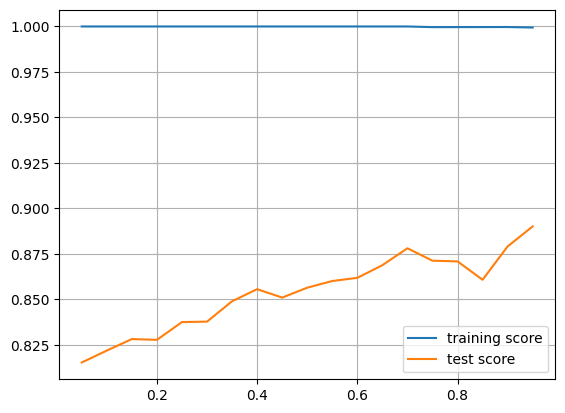

In [27]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')
train_size = np.arange(0.05, 1, 0.05)
train = []
test = []

for size in train_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y_b, train_size=size, random_state=42)
    model.fit(X_train, y_train)
    
    train.append(accuracy_score(y_train, model.predict(X_train)))
    test.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(train_size, train, label='training score')
plt.plot(train_size, test, label='test score')
plt.legend()
plt.grid()

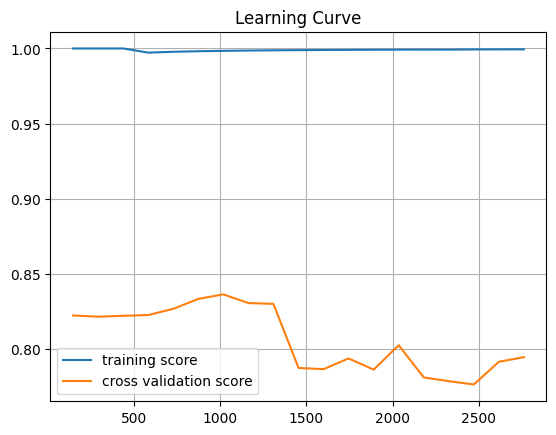

In [28]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')

train_size_abs, train_scores, test_scores = learning_curve(model, X, y_b, train_sizes=np.arange(0.05, 1, 0.05))

plt.plot(train_size_abs, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_size_abs, np.mean(test_scores, axis=1), label='cross validation score')
plt.title('Learning Curve')
plt.legend()
plt.grid()

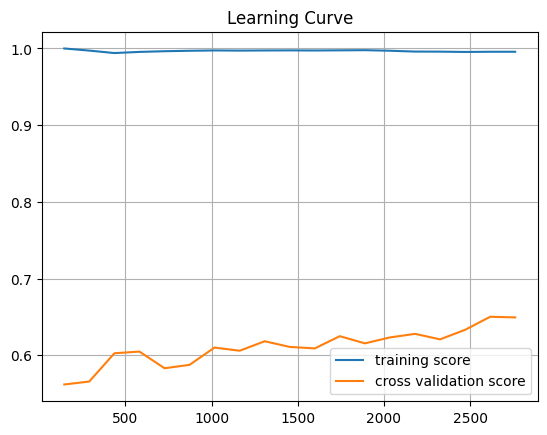

In [29]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced')

train_size_abs, train_scores, test_scores = learning_curve(model, X, y_gb, train_sizes=np.arange(0.05, 1, 0.05), n_jobs=4)

plt.plot(train_size_abs, np.mean(train_scores, axis=1), label='training score')
plt.plot(train_size_abs, np.mean(test_scores, axis=1), label='cross validation score')
plt.title('Learning Curve')
plt.legend()
plt.grid()